In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load dataset
file_path = "/content/Dataset .csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
print(df.columns)  # Check actual column names


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [ ]:
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')


In [ ]:
# Split cuisine combinations into lists
df['Cuisines'] = df['Cuisines'].astype(str).str.split(", ")

# Flatten the list of cuisines and count occurrences
cuisine_combinations = Counter([", ".join(sorted(c)) for c in df['Cuisines'] if len(c) > 1])

# Display top 10 most common combinations
most_common_combinations = cuisine_combinations.most_common(10)
print("Top 10 Most Common Cuisine Combinations:")
for combo, count in most_common_combinations:
    print(f"{combo}: {count} restaurants")


Top 10 Most Common Cuisine Combinations:
Chinese, North Indian: 616 restaurants
Mughlai, North Indian: 394 restaurants
Chinese, Mughlai, North Indian: 306 restaurants
Bakery, Desserts: 181 restaurants
Chinese, Fast Food: 159 restaurants
Fast Food, Pizza: 142 restaurants
Chinese, North Indian, South Indian: 135 restaurants
Mithai, Street Food: 134 restaurants
Fast Food, North Indian: 120 restaurants
Bakery, Fast Food: 117 restaurants


In [ ]:
# Create a new column for sorted cuisine combinations
df['Cuisine Combination'] = df['Cuisines'].apply(lambda x: ", ".join(sorted(x)) if isinstance(x, list) else x)

# Group by cuisine combination and find average rating
cuisine_ratings = df.groupby('Cuisine Combination')['Aggregate rating'].mean().sort_values(ascending=False)

# Display top 10 highest-rated cuisine combinations
print("Top 10 Highest-Rated Cuisine Combinations:")
print(cuisine_ratings.head(10))


Top 10 Highest-Rated Cuisine Combinations:
Cuisine Combination
American, BBQ, Sandwich            4.9
Bar Food, Burger, Steak            4.9
Contemporary, European             4.9
Indonesian, Sunda                  4.9
Hawaiian, Seafood                  4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
American, Healthy Food, Mexican    4.9
BBQ, Breakfast, Southern           4.9
Deli, Italian                      4.9
Name: Aggregate rating, dtype: float64


<ipython-input-6-46d5866b6820>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Cuisine Combination", data=common_df, palette="coolwarm")


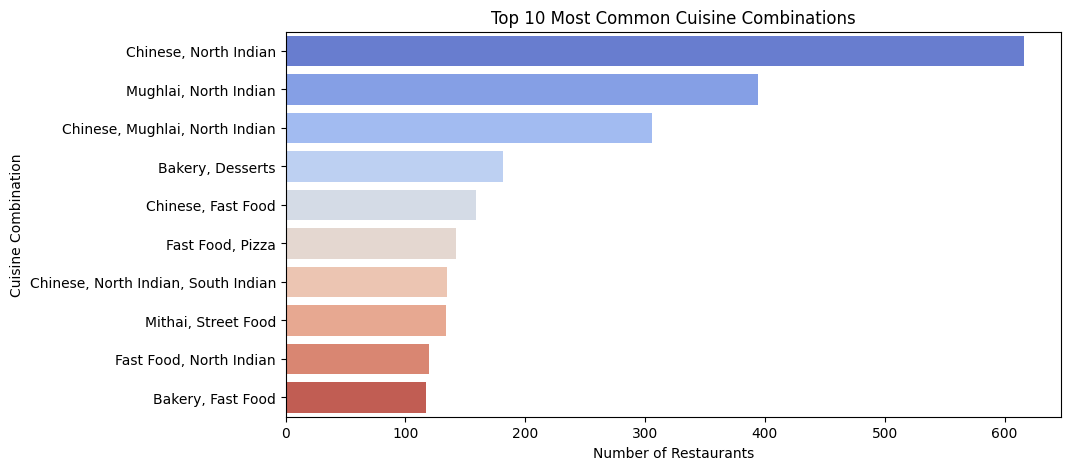

In [ ]:
plt.figure(figsize=(10, 5))
common_df = pd.DataFrame(most_common_combinations, columns=["Cuisine Combination", "Count"])
sns.barplot(x="Count", y="Cuisine Combination", data=common_df, palette="coolwarm")

plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Combination")
plt.title("Top 10 Most Common Cuisine Combinations")
plt.show()


<ipython-input-7-bf209898152f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Aggregate rating", y="Cuisine Combination", data=top_rated_df, palette="viridis")


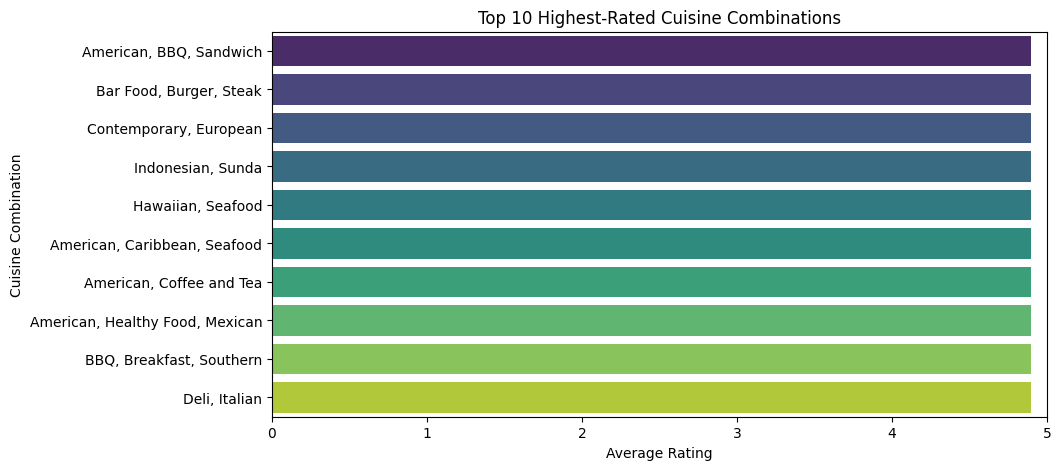

In [ ]:
plt.figure(figsize=(10, 5))
top_rated_df = cuisine_ratings.head(10).reset_index()
sns.barplot(x="Aggregate rating", y="Cuisine Combination", data=top_rated_df, palette="viridis")

plt.xlabel("Average Rating")
plt.ylabel("Cuisine Combination")
plt.title("Top 10 Highest-Rated Cuisine Combinations")
plt.xlim(0, 5)
plt.show()


In [ ]:
#LEVEL 2(TASK 3)

In [ ]:
!pip install folium geopandas
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap


In [ ]:
# Load dataset
file_path = "/content/Dataset .csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [ ]:
df.rename(columns={'Latitude': 'lat', 'Longitude': 'lon'}, inplace=True)


In [ ]:
# Get the center of the map
map_center = [df['lat'].mean(), df['lon'].mean()]

# Create a map
restaurant_map = folium.Map(location=map_center, zoom_start=12)

# Add restaurant markers
for _, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=row['Restaurant Name'],  # Adjust column name if needed
        icon=folium.Icon(color="blue", icon="cutlery", prefix="fa"),
    ).add_to(restaurant_map)

# Display the map
restaurant_map


In [ ]:
# Create a heatmap
heatmap_map = folium.Map(location=map_center, zoom_start=12)
HeatMap(df[['lat', 'lon']].values, radius=15).add_to(heatmap_map)

# Display the heatmap
heatmap_map


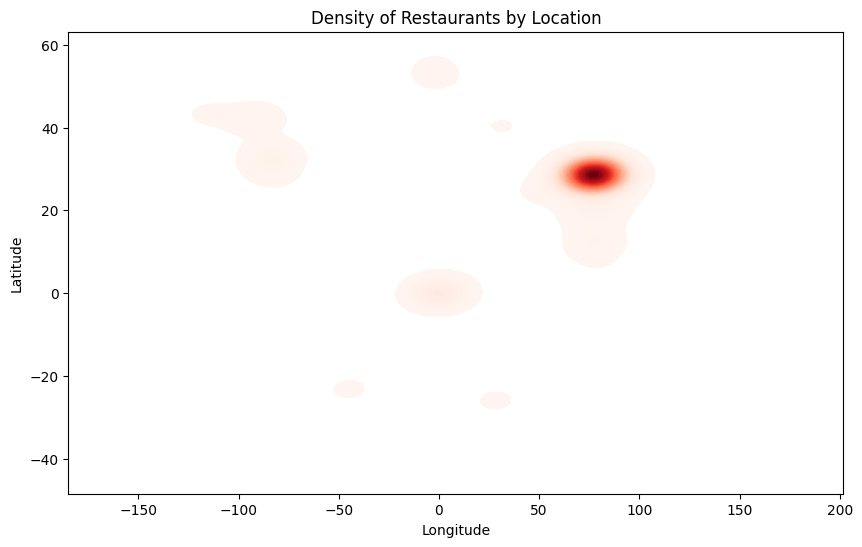

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['lon'], y=df['lat'], cmap="Reds", fill=True, levels=50)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Density of Restaurants by Location")
plt.show()


In [ ]:
#LEVEL 2 (TASK 4)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Dataset .csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
# Count how many times each restaurant name appears
chain_counts = df['Restaurant Name'].value_counts()

# Identify restaurant chains (those appearing more than once)
restaurant_chains = chain_counts[chain_counts > 1]
print("Top Restaurant Chains in the Dataset:")
print(restaurant_chains.head(10))


Top Restaurant Chains in the Dataset:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


In [ ]:
# Merge the chain counts into the original dataset
df['Is Chain'] = df['Restaurant Name'].apply(lambda x: x in restaurant_chains)

# Group by restaurant name and calculate average rating & votes
chain_ratings = df[df['Is Chain']].groupby('Restaurant Name').agg(
    Average_Rating=('Aggregate rating', 'mean'),
    Total_Votes=('Votes', 'sum'),
    Number_of_Locations=('Restaurant Name', 'count')
).sort_values(by='Number_of_Locations', ascending=False)

# Display top 10 chains with highest number of locations
print("Top 10 Restaurant Chains by Number of Locations:")
print(chain_ratings.head(10))


Top 10 Restaurant Chains by Number of Locations:
                  Average_Rating  Total_Votes  Number_of_Locations
Restaurant Name                                                   
Cafe Coffee Day         2.419277         2428                   83
Domino's Pizza          2.740506         6643                   79
Subway                  2.907937         6124                   63
Green Chick Chop        2.672549          964                   51
McDonald's              3.339583         5291                   48
Keventers               2.870588         1263                   34
Pizza Hut               3.320000         4961                   30
Giani                   2.689655          854                   29
Baskin Robbins          1.860714          428                   28
Barbeque Nation         4.353846        28142                   26


<ipython-input-19-533cecb30370>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chains.index, y=top_chains['Number_of_Locations'], palette="coolwarm")


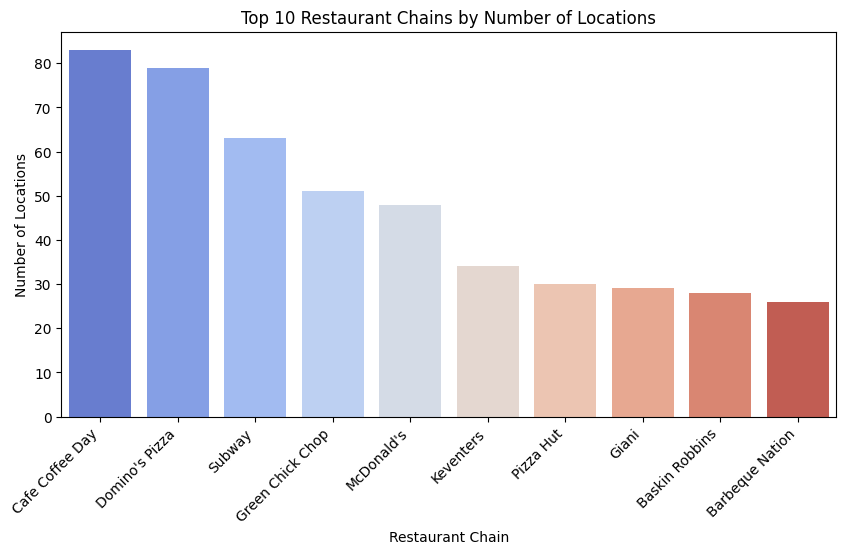

<ipython-input-19-533cecb30370>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chains.index, y=top_chains['Average_Rating'], palette="viridis")


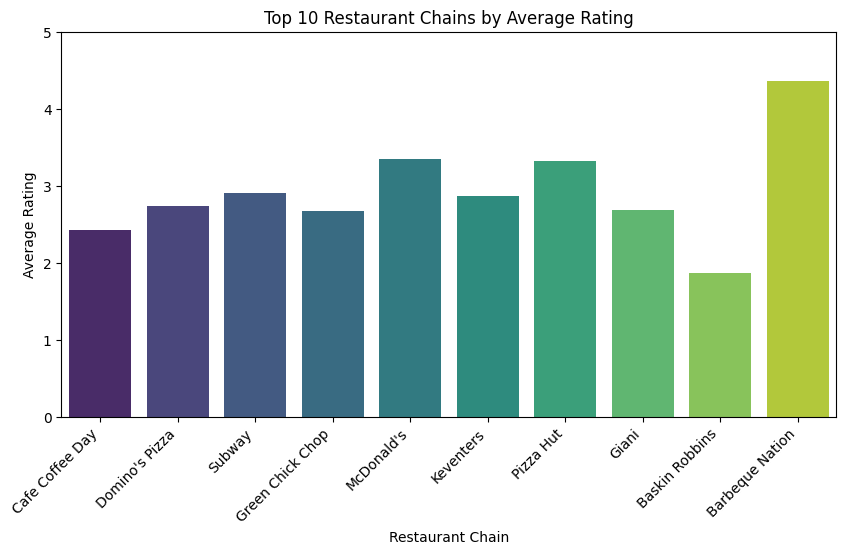

In [ ]:
# Select top 10 chains by number of locations
top_chains = chain_ratings.head(10)

# Bar plot for number of locations
plt.figure(figsize=(10, 5))
sns.barplot(x=top_chains.index, y=top_chains['Number_of_Locations'], palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Locations")
plt.title("Top 10 Restaurant Chains by Number of Locations")
plt.show()

# Bar plot for average ratings
plt.figure(figsize=(10, 5))
sns.barplot(x=top_chains.index, y=top_chains['Average_Rating'], palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Rating")
plt.title("Top 10 Restaurant Chains by Average Rating")
plt.ylim(0, 5)  # Ratings range from 0 to 5
plt.show()
